Introduction: Understanding how different housing features affect house demand and sales volume.

Kansas city is the third most popular city in the US. As a result this has led to population increase and increase in demand for housing .The housing market is also competitive as most investors throng to take advantage of the increasing population.71% of Kansas City homebuyers searched to stay within the Kansas City metropolitan area  and 0.37% of homebuyers searched to move into Kansas City from outside metros.

Business Problem
Develop a predictive model to estimate house prices based on features such as size, number of bedrooms, bathrooms, and location and  Square footage of the living space.
Objectives.
1.Analyze the impact of renovations and house conditions on the market value of properties
2.Advise potential investors on the house sizes and the demand
3.Insights and visualizations showing how house sizes and status affect sale prices.

In [2]:

#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

Loading the data

In [3]:
df = pd.read_csv('../data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

kc housing column descriptions

descpription of features of the data set 
id: Unique identifier for each house
1.date: Date of the sale
2.price: Sale price
3.bedrooms: Number of bedrooms
4.bathrooms: Number of bathrooms
5.sqft_living: Square footage of the living space
6.sqft_lot: Square footage of the lot
7.floors: Number of floors
8.waterfront: Whether the house has a waterfront view
9.view: Quality of the view from the house
10.condition: Condition of the house
11.grade: Overall grade given to the housing unit, based on King County grading system
12.sqft_above: Square footage of the house apart from basement
13.sqft_basement: Square footage of the basement
14.yr_built: Year the house was built
15.yr_renovated: Year the house was renovated
16.zipcode: Zipcode of the location
17.lat: Latitude coordinate


EDA and Data Cleaning

In [5]:
df.shape

(21597, 21)

There are 21597 rows and 21 columns in the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


checking out for null values

In [8]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

waterfront has 2376 missing values,view has 63 and yr_renovated has 3,842, the rest of the data has no missing values

In [9]:
df.dropna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [10]:
df = df.fillna(df.mean())

In [14]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<Figure size 1440x1080 with 0 Axes>

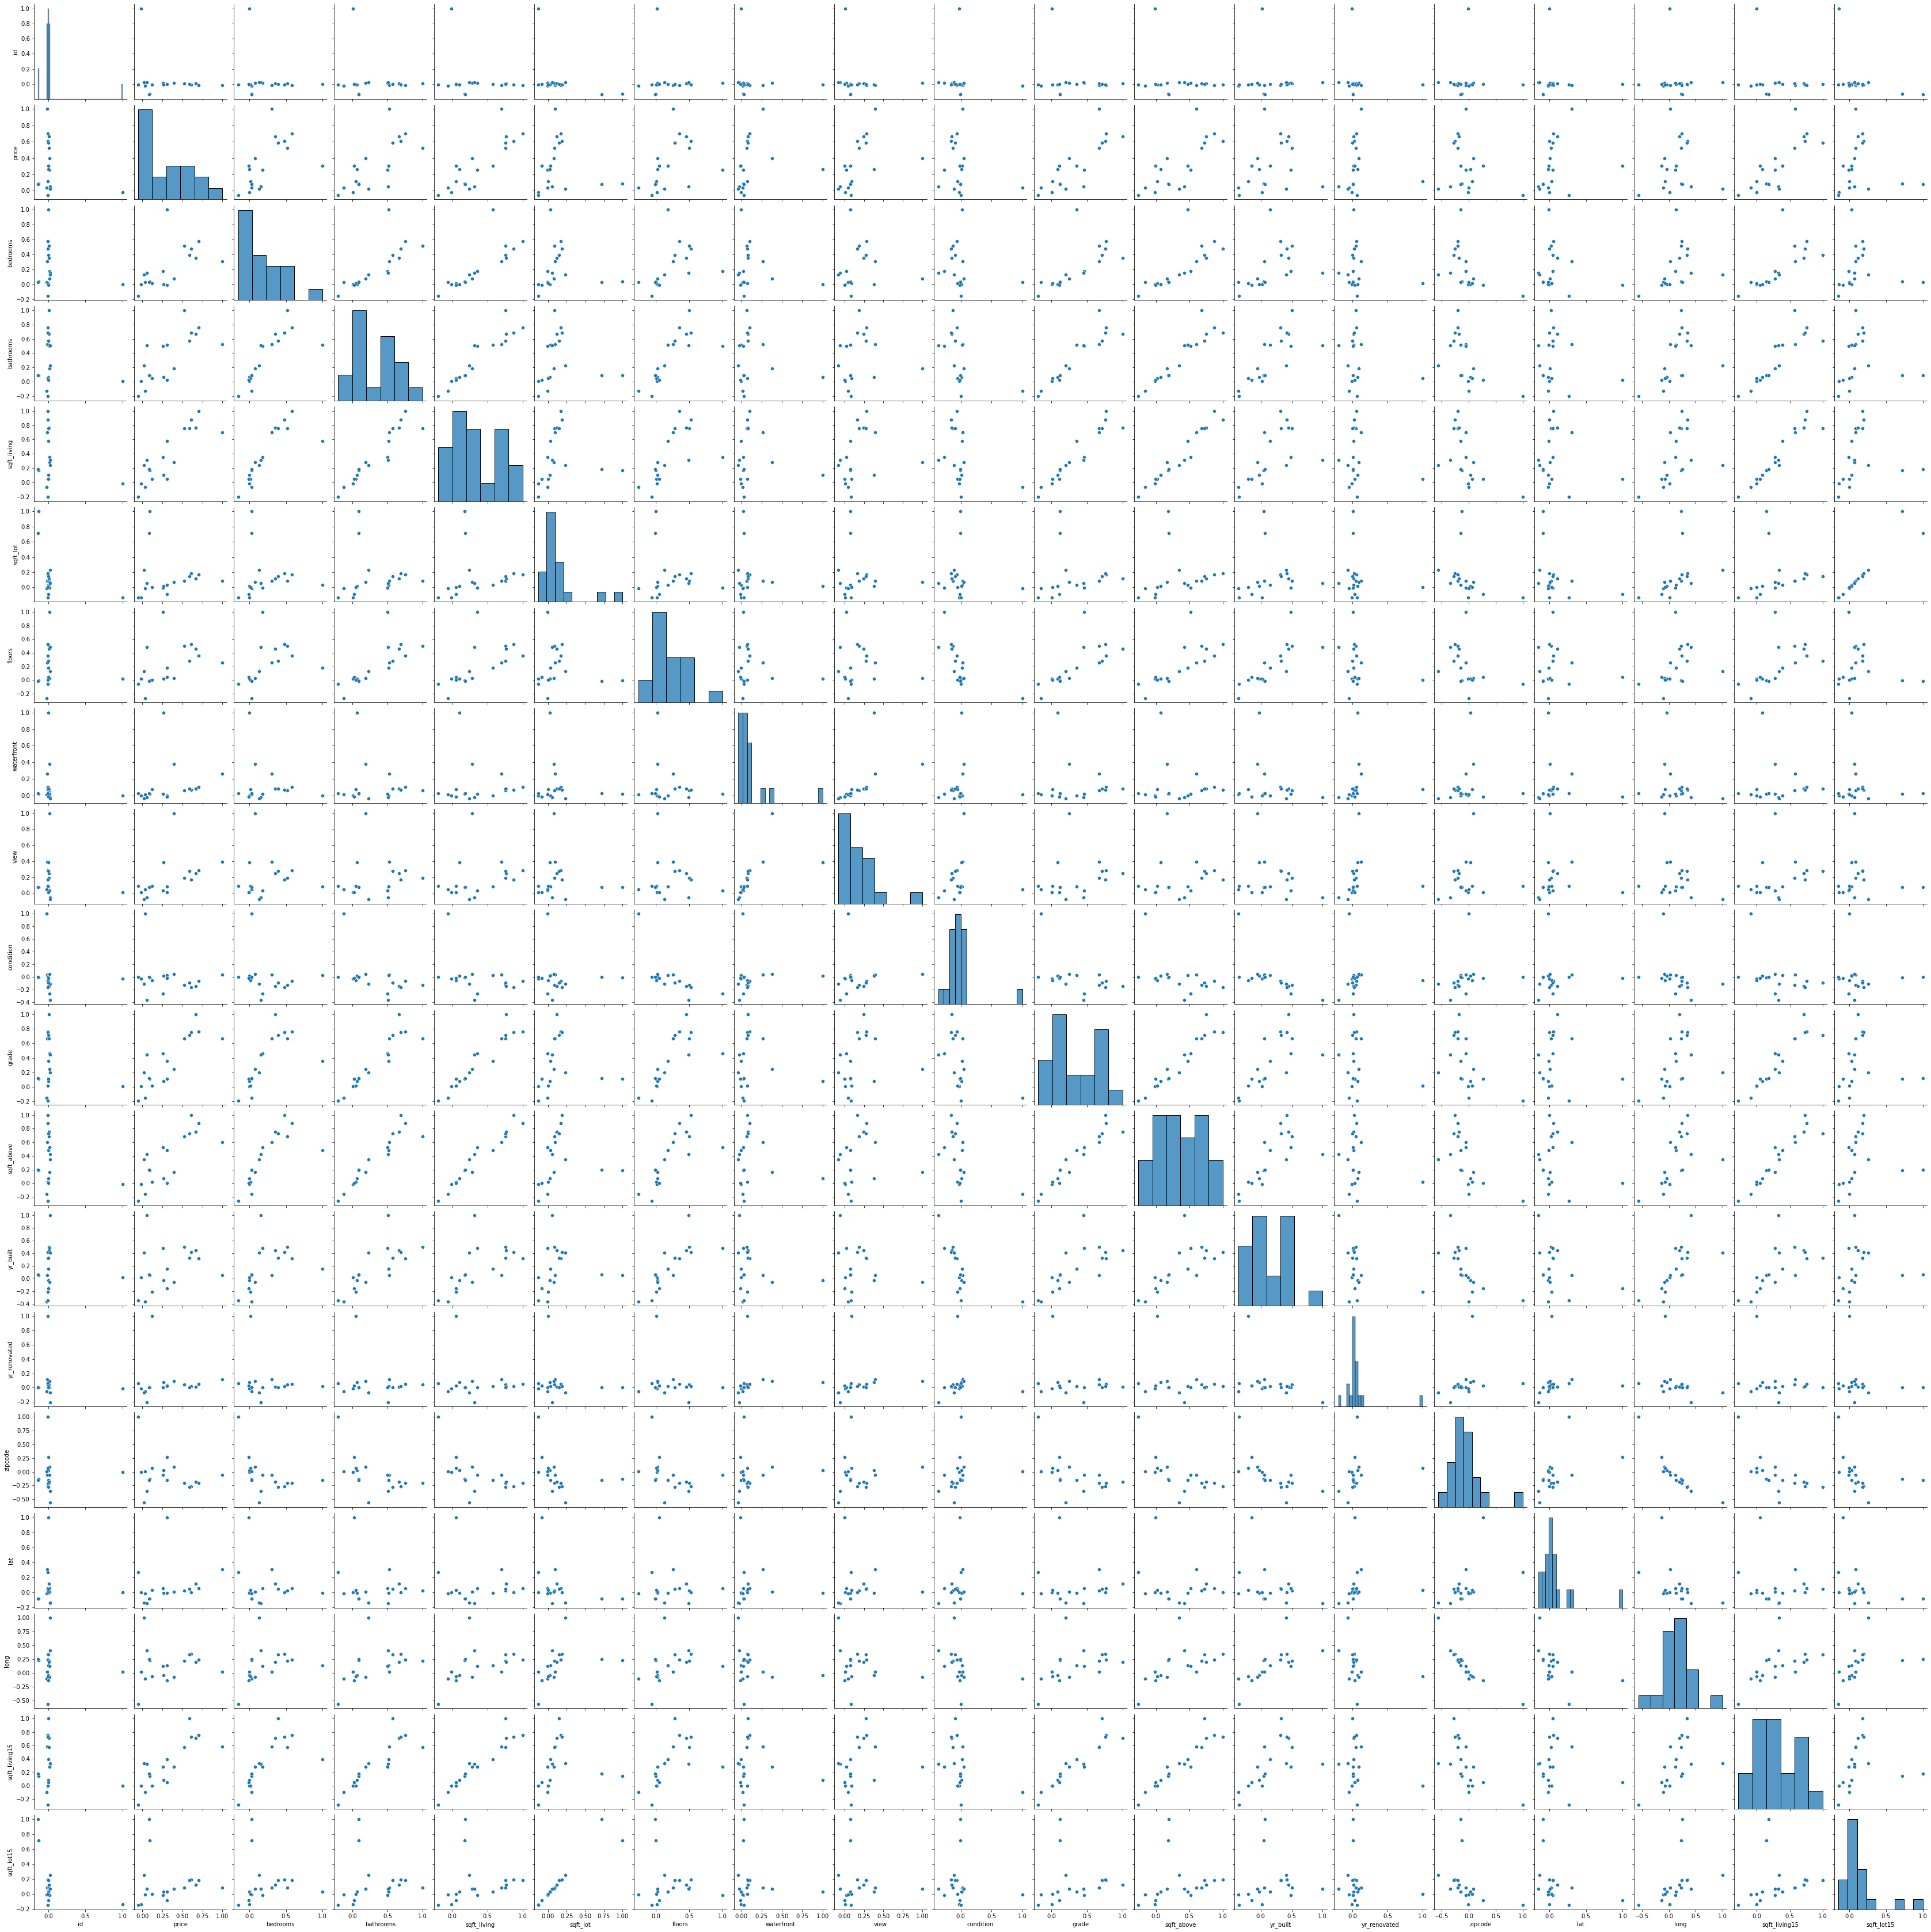

In [15]:
correlation =df.corr()
plt.figure(figsize=(20,15))
sns.pairplot(df.corr())

<AxesSubplot:>

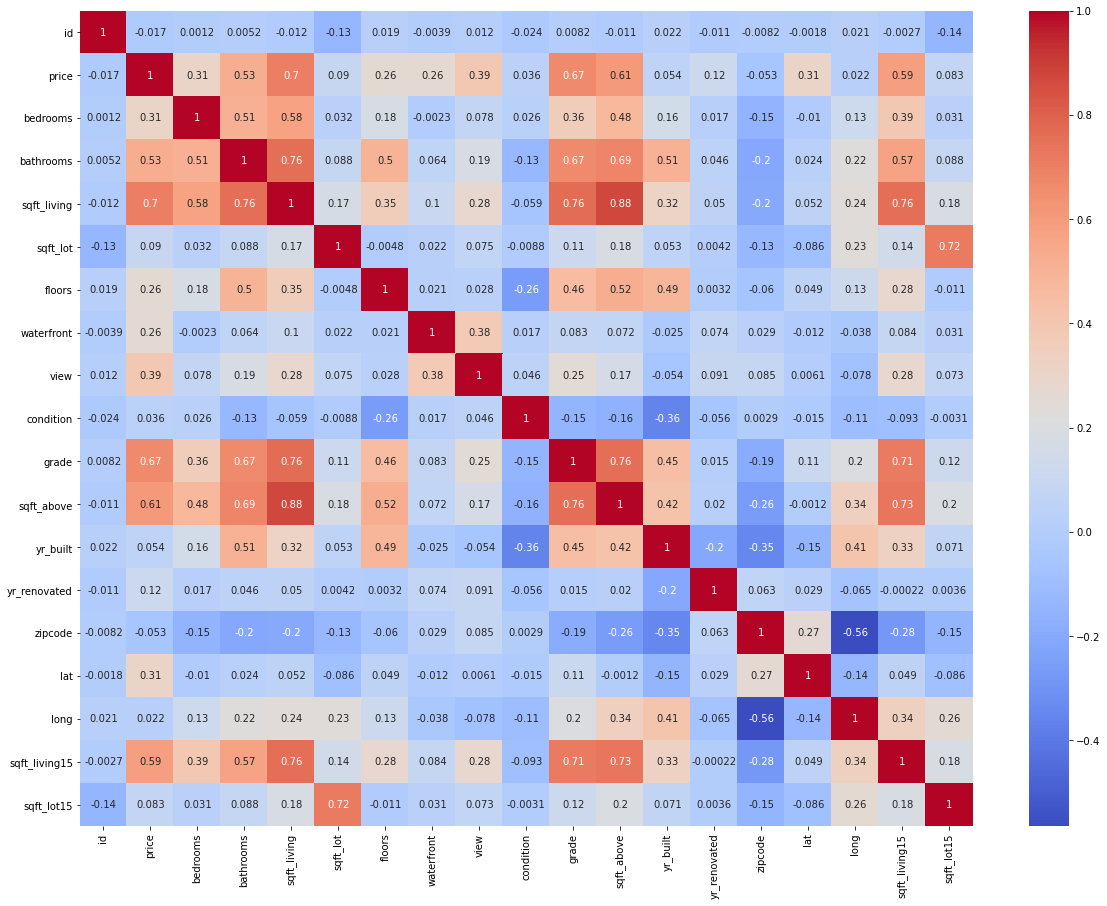

In [16]:
correlation =df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)


Feature Selection

The most impotant features are:price - The target variable for prediction.
sqft_living - Square footage of the living space.
bedrooms - Number of bedrooms.
bathrooms - Number of bathrooms.
zipcode - Location identifier.
grade - The grade given to the housing unit, based on King County grading system.

In [18]:
df=[['price','sqft_living','bedrooms' , 'bathrooms', 'zipcode','grade',]]

[['price', 'sqft_living', 'bedrooms', 'bathrooms', 'zipcode', 'grade']]

Based on the correlation coefficients with King county dataset, we can justify the selection of the most important columns:

1.sqft_living (0.701917): The square footage of the living space has the highest correlation with price, indicating a strong positive relationship. Larger living areas generally increase the value of a house
2.Grade (0.667951): The grade assigned to a house (which reflects its overall construction and design quality) also shows a strong positive correlation with price. Higher grade houses tend to be more expensive.
3.sqft_above (0.605368): The square footage of the above-ground living space is another important factor. More above-ground space typically means a higher house price.
4.sqft_living15 (0.585241): The square footage of living space for the nearest 15 neighbors indicates neighborhood size, which impacts house prices. Larger neighboring houses often lead to higher property values.
5.bathrooms (0.525906): The number of bathrooms is positively correlated with house price, as more bathrooms generally increase the house's market value.
6.bedrooms (0.308787): Although the correlation is not as strong as other features, the number of bedrooms still shows a positive relationship with price. More bedrooms can add to the house's value, especially for larger families.
*Other factors like view (0.395734) and waterfront (0.276295) also contribute but are not as strongly correlated as the top features listed above.

Plotting a Seaborn visualization of the data

In [19]:
sns.pairplot(data=df)

TypeError: 'data' must be pandas DataFrame object, not: <class 'list'>

Data Cleaning

Checking for outliers

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box plots of the important house features for King county data set')
plt.xlabel('features')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.show()

ValueError: could not convert string to float: 'sqft_living'

<Figure size 720x432 with 0 Axes>

There seems to be outliers in the zip code.

Getting out the outliers

In [ ]:
Q1 = df['sqft_living'].quantile(0.25)
Q3 = df['sqft_living'].quantile(0.75)
IQR = Q3 - Q1
Q1, Q3,IQR

(1430.0, 2550.0, 1120.0)

In [ ]:
# Defining the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound,upper_bound

(-250.0, 4230.0)

Finding the outliers


In [ ]:
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)
outlier_indices = df.index[outliers]
outlier_indices 

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            21587, 21588, 21589, 21590, 21591, 21592, 21593, 21594, 21595,
            21596],
           dtype='int64', length=21597)

Removing the outliers

In [ ]:
df = df.drop(outlier_indices)
df

,sqft_living,bedrooms,bathrooms,zipcode,grade,price


Checking for Duplicates

In [ ]:
df.duplicated().sum()

0

Data analysis 1

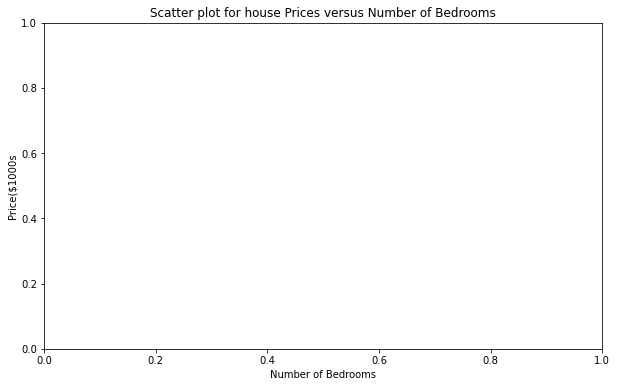

In [ ]:
#Relationship between house price and number of bedrooms
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.title('Scatter plot for house Prices versus Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price($1000s')
plt.show()

Data analysis 2

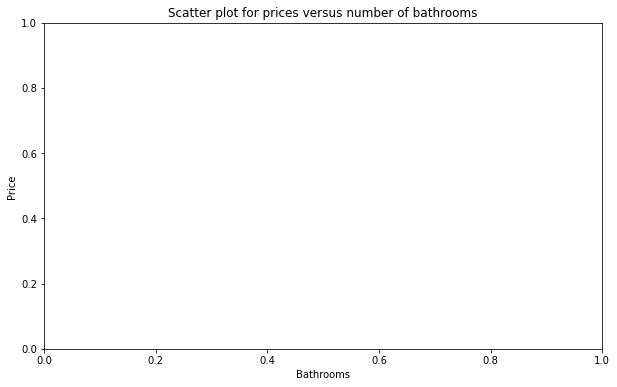

In [ ]:
#Relationship between house price and number of bathrooms
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bathrooms', y='price', data=df)
plt.title('Scatter plot for prices versus number of bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

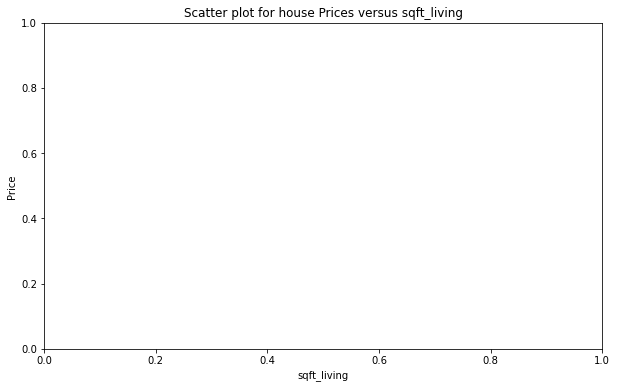

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Scatter plot for house Prices versus sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.show()

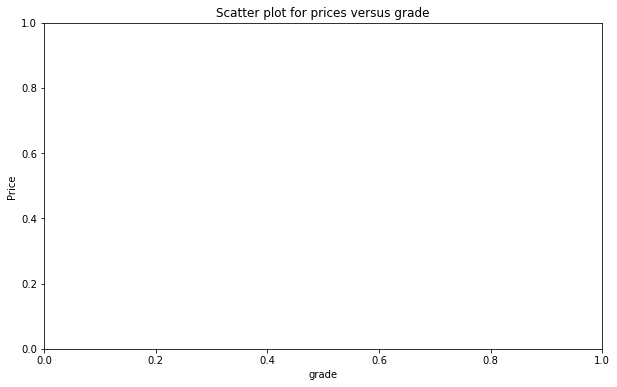

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='grade', y='price', data=df)
plt.title('Scatter plot for prices versus grade')
plt.xlabel('grade')
plt.ylabel('Price')
plt.show()

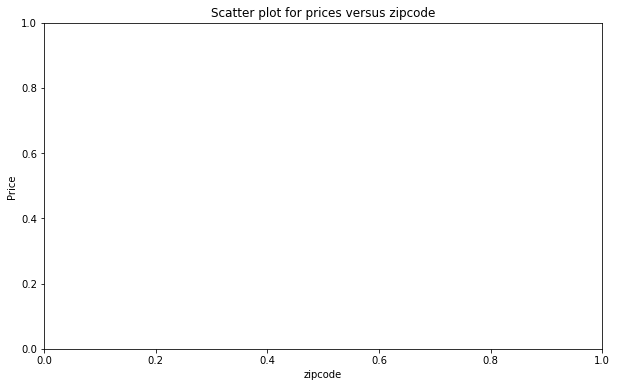

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='zipcode', y='price', data=df)
plt.title('Scatter plot for prices versus zipcode')
plt.xlabel('zipcode')
plt.ylabel('Price')
plt.show()

Data Preparations

<AxesSubplot:>

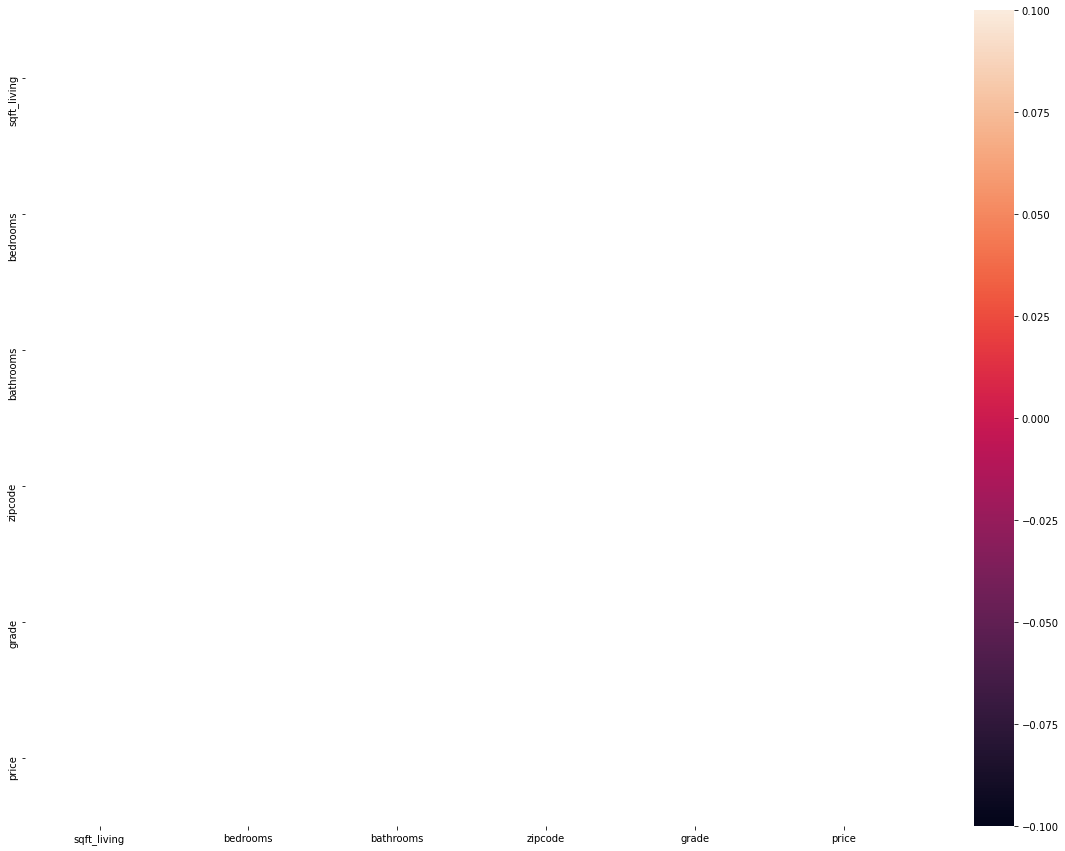

In [ ]:
correlation =df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(data=df.corr(),annot=True)

Data Preparations

In [ ]:
x = df[['sqft_living', 'bedrooms','grade']]
x.head()

,sqft_living,bedrooms,grade
